# 1. Import Package

In [2]:
!pip install jcopdl
!pip install gdown

  Created wheel for jcopdl: filename=jcopdl-1.1.9-py2.py3-none-any.whl size=16925 sha256=989522c81e84f8f1567cb968f1ffd0fe086520d040ec51971b19c21e52394db4
  Stored in directory: /root/.cache/pip/wheels/bb/fd/9d/fc72bcf569000eabd487e654fdf55b587e66882b60eaa5693b
Successfully built jcopdl


In [21]:
import jcopdl
jcopdl.__version__

'1.1.1'

## 1.1 Saya mendownload data image yang ada pada gdrive

In [4]:
!gdown https://drive.google.com/uc?id=1G7VwUtI5eN3dIOdemHgb_SPdrIB2q8pJ

Downloading...
From: https://drive.google.com/uc?id=1G7VwUtI5eN3dIOdemHgb_SPdrIB2q8pJ
To: /content/panorama.zip
25.7MB [00:00, 55.3MB/s]


**Setelah data di download masih dalam keadaan `zip`, langkah selanjutnya adalah melakukan ekstraksi pada data tersebut.<br>
Data sudah siap digunakan.**

In [5]:
!unzip /content/panorama.zip

Archive:  /content/panorama.zip
   creating: data/
  inflating: data/test_label.csv     
  inflating: data/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._.DS_Store  
   creating: data/test/
  inflating: data/test/1409.jpg      
   creating: __MACOSX/data/test/
  inflating: __MACOSX/data/test/._1409.jpg  
  inflating: data/test/1347.jpg      
  inflating: __MACOSX/data/test/._1347.jpg  
  inflating: data/test/1145.jpg      
  inflating: __MACOSX/data/test/._1145.jpg  
  inflating: data/test/360.jpg       
  inflating: __MACOSX/data/test/._360.jpg  
  inflating: data/test/1192.jpg      
  inflating: __MACOSX/data/test/._1192.jpg  
  inflating: data/test/374.jpg       
  inflating: __MACOSX/data/test/._374.jpg  
  inflating: data/test/1964.jpg      
  inflating: __MACOSX/data/test/._1964.jpg  
  inflating: data/test/1958.jpg      
  inflating: __MACOSX/data/test/._1958.jpg  
  inflating: data/test/572.jpg       
  inflating: __MACOSX/da

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

# 2. Dataset & Dataloader

In [23]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from jcopdl.utils.dataloader import MultilabelDataset

**Pada kasus ini kita akan memakai CNN yang sudah populer yaitu "MobileNet V2"**

In [39]:
bs = 64
crop_size = 224 # ini wajib 224, jangan dirubah karena kita pakai CNN sang juara
train_transform = transforms.Compose([
    transforms.RandomRotation(110),
    transforms.RandomResizedCrop(crop_size, scale=(0.7, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #transform normalize(normalisasi) dari model "Mobilenet V2"
    
])

test_transform = transforms.Compose([   # data test jangan di augmentasi
    transforms.Resize(230),   # resize untuk menyamakan resolusi dari gambar yang berbeda-beda, tapi tetep lebih besar dari crop_size
    transforms.CenterCrop(224), # ini wajib 224, jangan dirubah karena kita pakai CNN sang juara "MobileNet V2"
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #transform normalize(normalisasi) dari model "Mobilenet V2"
])


train_set = MultilabelDataset("data/train_label.csv", "data/train/", transform=train_transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=4)


test_set = MultilabelDataset("data/test_label.csv", "data/test/", transform=test_transform) #fname_col(tergantung nama kolom di csv)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)

In [40]:
feature, target = next(iter(testloader))

In [41]:
target

tensor([[0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 1., 1.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [0

In [42]:
label2cat = train_set.classes

In [145]:
label2cat

['desert', 'mountains', 'sea', 'sunset', 'trees']

# 3. Arsitektur & Config

**Seperti yang telah dijelaskan sebelumnya, pada kasus ini akan menggunakan CNN "MobilNet V2"**

**Contoh cara memakai Pretrained-Model**

**Import CNN "MobileNet V2"**

In [14]:
from torchvision.models import mobilenet_v2

In [15]:
mnet = mobilenet_v2(pretrained=True) #Pretrained=True (kita download arsitektur dan weight dari CNN sang juara)
                                     #Pretrained=False (kita hanya download arsitektur dari CNN sang juara)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


In [16]:
for param in mnet.parameters():    # Weight dari sang juara kita lakukan Freeze agar tidak berubah saat di train pakai data kita
    param.requires_grad = False

In [17]:
mnet

MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momen

**Terlihat dari keterangan mnet di atas Neural Networknya/Full Connected ("paling bawah") masih menggunakan out_features=1000 atau 100 kelas (kasus MobilNet V2 memang didesain untuk melakukan klasifikasi yang "Multiclass"). Karena pada kasus ini adalah "Multilabel" maka bagian FullConnected/Neural Network akan dirubah menjadi kasus "Multilabel".**

## 3.1 Custom Neural Network dari MobileNet V2

**Di bawah ini Neural Network "MobileNet V2" telah dirubah dari "MultiClass" menjadi "Multilabel"**

In [19]:
mnet.classifier = nn.Sequential(
    nn.Linear(1280, 5),  # 5 karena dari label2cat 
    nn.Sigmoid()         # pakai Sigmoid karena kasus kita Multilabel
)

In [20]:
len(train_set.classes)

5

In [21]:
mnet

MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momen

## 3.2 Membuat sebuah Class Arsitektur 

In [22]:
class CustomMobilenetV2(nn.Module):
    def __init__(self, output_size):
        super().__init__()
        self.mnet = mobilenet_v2(pretrained=True)
        self.freeze()
        self.mnet.classifier = nn.Sequential(
            nn.Linear(1280, output_size),  # tergantung len dari label2cat 
            nn.Sigmoid()                   # pakai Sigmoid karena kasus kita Multilabel

        )
        
        
    def forward(self, x):
        return self.mnet(x)
        
    def freeze(self):
        for param in mnet.parameters():    # Weight dari sang juara kita lakukan Freeze agar tidak berubah saat di train pakai data kita
            param.requires_grad = False
    
    def unfreeze(self):
        for param in mnet.parameters():    # Weight dari sang juara kita lakukan unfreeze agarberubah saat di train pakai data kita
            param.requires_grad = True

In [23]:
config = set_config({
    "output_size": len(train_set.classes),
    "batch_size": bs,
    "crop_size": crop_size
})

# 4. Training Model

## 4.1 Phase 1 : Adaptation (lr standard + patience kecil)

### 4.1.1 Training Preparation -> MCOC

In [24]:
model = CustomMobilenetV2(config.output_size).to(device)
criterion = nn.BCELoss() 
optimizer = optim.AdamW(model.parameters(), lr=0.001) # Optimizer AdamW sudaha ada Regulerization sehingga bisa mengurangi Overfit
callback = Callback(model, config, early_stop_patience=2, outdir="model")  # callback membantu kita save model

#### 4.1.1.1 Training 

In [25]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost =  0
    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        cost += loss.item() * feature.shape[0]
       
    cost = cost /len(dataset)
    return cost

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))




Epoch     1
Train_cost  = 0.3293 | Test_cost  = 0.4010 | 




Epoch     2
Train_cost  = 0.2559 | Test_cost  = 0.2675 | 




Epoch     3
Train_cost  = 0.2225 | Test_cost  = 0.2627 | 




Epoch     4
Train_cost  = 0.2009 | Test_cost  = 0.2672 | 
==> EarlyStop patience =  1 | Best test_cost: 0.2627




Epoch     5
Train_cost  = 0.2013 | Test_cost  = 0.3116 | 
==> EarlyStop patience =  2 | Best test_cost: 0.2627
==> Execute Early Stopping at epoch: 5 | Best test_cost: 0.2627
==> Best model is saved at model


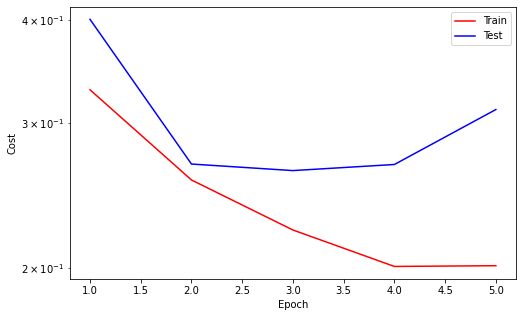

In [26]:
while True:
    train_cost = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
        
    # Logging
    callback.log(train_cost, test_cost)
    
    # Checkpoint(ini cocok untuk training yang berat yang berminggu2 atau yang takut mati lampu ditengah jalan, jadi kalo bisa tiap berapa epoch ada save checkpoint) untuk safety
    callback.save_checkpoint()
    
    # sambil training sambil ngeplot
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break

## 4. 2 Phase 2: Fine-tuning (lr dikecilin, patience ditambah)

In [27]:
model.unfreeze()
optimizer = optim.AdamW(model.parameters(), lr=1e-5)

callback.reset_early_stop()
callback.early_stop_patience = 5

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))




Epoch     6
Train_cost  = 0.1878 | Test_cost  = 0.2224 | 




Epoch     7
Train_cost  = 0.1780 | Test_cost  = 0.2141 | 




Epoch     8
Train_cost  = 0.1749 | Test_cost  = 0.2076 | 




Epoch     9
Train_cost  = 0.1584 | Test_cost  = 0.2046 | 




Epoch    10
Train_cost  = 0.1586 | Test_cost  = 0.2041 | 




Epoch    11
Train_cost  = 0.1565 | Test_cost  = 0.2030 | 




Epoch    12
Train_cost  = 0.1563 | Test_cost  = 0.2036 | 
==> EarlyStop patience =  1 | Best test_cost: 0.2030




Epoch    13
Train_cost  = 0.1525 | Test_cost  = 0.2051 | 
==> EarlyStop patience =  2 | Best test_cost: 0.2030




Epoch    14
Train_cost  = 0.1532 | Test_cost  = 0.2144 | 
==> EarlyStop patience =  3 | Best test_cost: 0.2030




Epoch    15
Train_cost  = 0.1450 | Test_cost  = 0.2003 | 




Epoch    16
Train_cost  = 0.1503 | Test_cost  = 0.1952 | 




Epoch    17
Train_cost  = 0.1463 | Test_cost  = 0.2042 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1952




Epoch    18
Train_cost  = 0.1430 | Test_cost  = 0.1955 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1952




Epoch    19
Train_cost  = 0.1438 | Test_cost  = 0.1983 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1952




Epoch    20
Train_cost  = 0.1415 | Test_cost  = 0.1947 | 


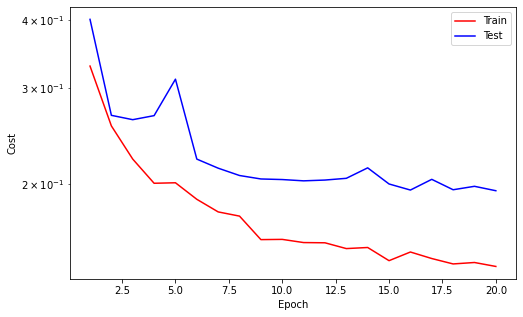



Epoch    21
Train_cost  = 0.1375 | Test_cost  = 0.1916 | 




Epoch    22
Train_cost  = 0.1456 | Test_cost  = 0.1958 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1916




Epoch    23
Train_cost  = 0.1369 | Test_cost  = 0.1954 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1916




Epoch    24
Train_cost  = 0.1365 | Test_cost  = 0.1979 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1916




Epoch    25
Train_cost  = 0.1330 | Test_cost  = 0.1911 | 




Epoch    26
Train_cost  = 0.1340 | Test_cost  = 0.2013 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1911




Epoch    27
Train_cost  = 0.1360 | Test_cost  = 0.2006 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1911




Epoch    28
Train_cost  = 0.1305 | Test_cost  = 0.1990 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1911




Epoch    29
Train_cost  = 0.1293 | Test_cost  = 0.2028 | 
==> EarlyStop patience =  4 | Best test_cost: 0.1911




Epoch    30
Train_cost  = 0.1308 | Test_cost  = 0.1947 | 
==> EarlyStop patience =  5 | Best test_cost: 0.1911
==> Execute Early Stopping at epoch: 30 | Best test_cost: 0.1911
==> Best model is saved at model


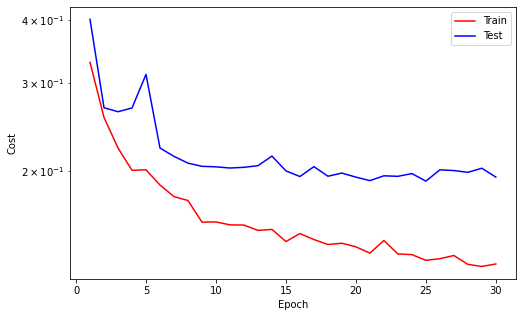

In [28]:
while True:
    train_cost = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
        
    # Logging
    callback.log(train_cost, test_cost)
    
    # Checkpoint(ini cocok untuk training yang berat yang berminggu2 atau yang takut mati lampu ditengah jalan, jadi kalo bisa tiap berapa epoch ada save checkpoint) untuk safety
    callback.save_checkpoint()
    
    # sambil training sambil ngeplot
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break

# 5. Predict dengan DataTest

In [29]:
feature, target = next(iter(testloader))
feature, target = feature.to(device), target.to(device) # pindahkan ke GPU 

In [30]:
with torch.no_grad():  
    model.eval()
    output = model(feature)
    preds = (output > 0.5).to(torch.float32) # 0.5 maksudnya thresholdnya
preds

tensor([[0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1.],
        [0., 1., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 1., 0.],
        [0., 1., 1., 0., 0.],
        [0., 1., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 1., 0., 0.],
        [0., 0., 1., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 1., 0.],
        [0., 1., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0

## 5.1 Sanity Check

In [31]:
def convert_to_label(x):
    return [label for pred, label in zip(x, label2cat) if pred==1]

def inverse_norm(img):
    img[0, :, :] = img[0, :, :] * 0.229 + 0.485
    img[1, :, :] = img[1, :, :] * 0.224 + 0.456
    img[2, :, :] = img[2, :, :] * 0.225 + 0.406
    return img

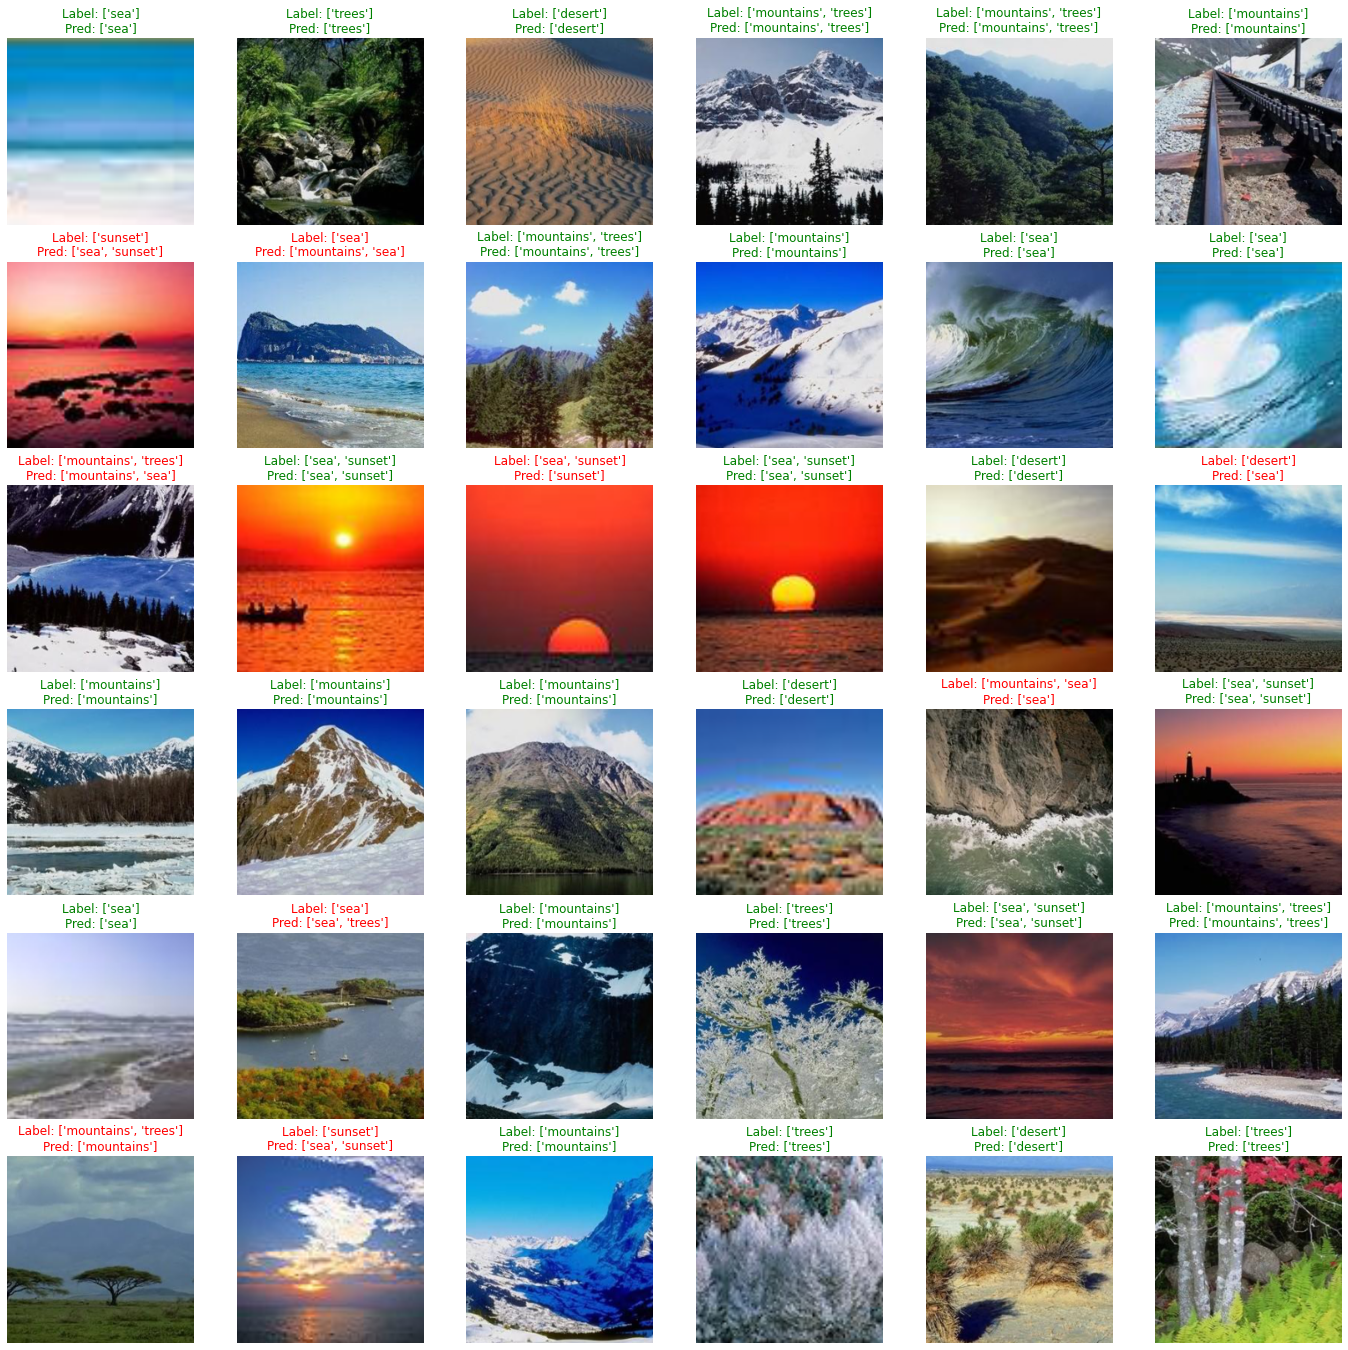

In [32]:
fig, axes = plt.subplots(6, 6, figsize=(24, 24))
for img, label, pred, ax in zip(feature, target, preds, axes.flatten()):
    ax.imshow(inverse_norm(img).permute(1, 2, 0).cpu())
    font = {"color": 'r'} if (pred != label).any() else {"color": 'g'}
    label, pred = convert_to_label(label), convert_to_label(pred)
    ax.set_title(f"Label: {label}\nPred: {pred}", fontdict=font);
    ax.axis('off');

# 6. Save Model ke Local Komputer

In [33]:
!zip -r model.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/weights_best.pth (deflated 8%)
  adding: content/model/configs.pth (deflated 51%)
  adding: content/model/logs.pth (deflated 31%)


**Terlihat dari gambar-gambar di atas, model sudah dapat dengan baik melakukan prediksi yang tidak jauh berbeda dengan label asli dari gambar tersebut**

# 7. Prediksi dengan Gambar yang didapat dari Google

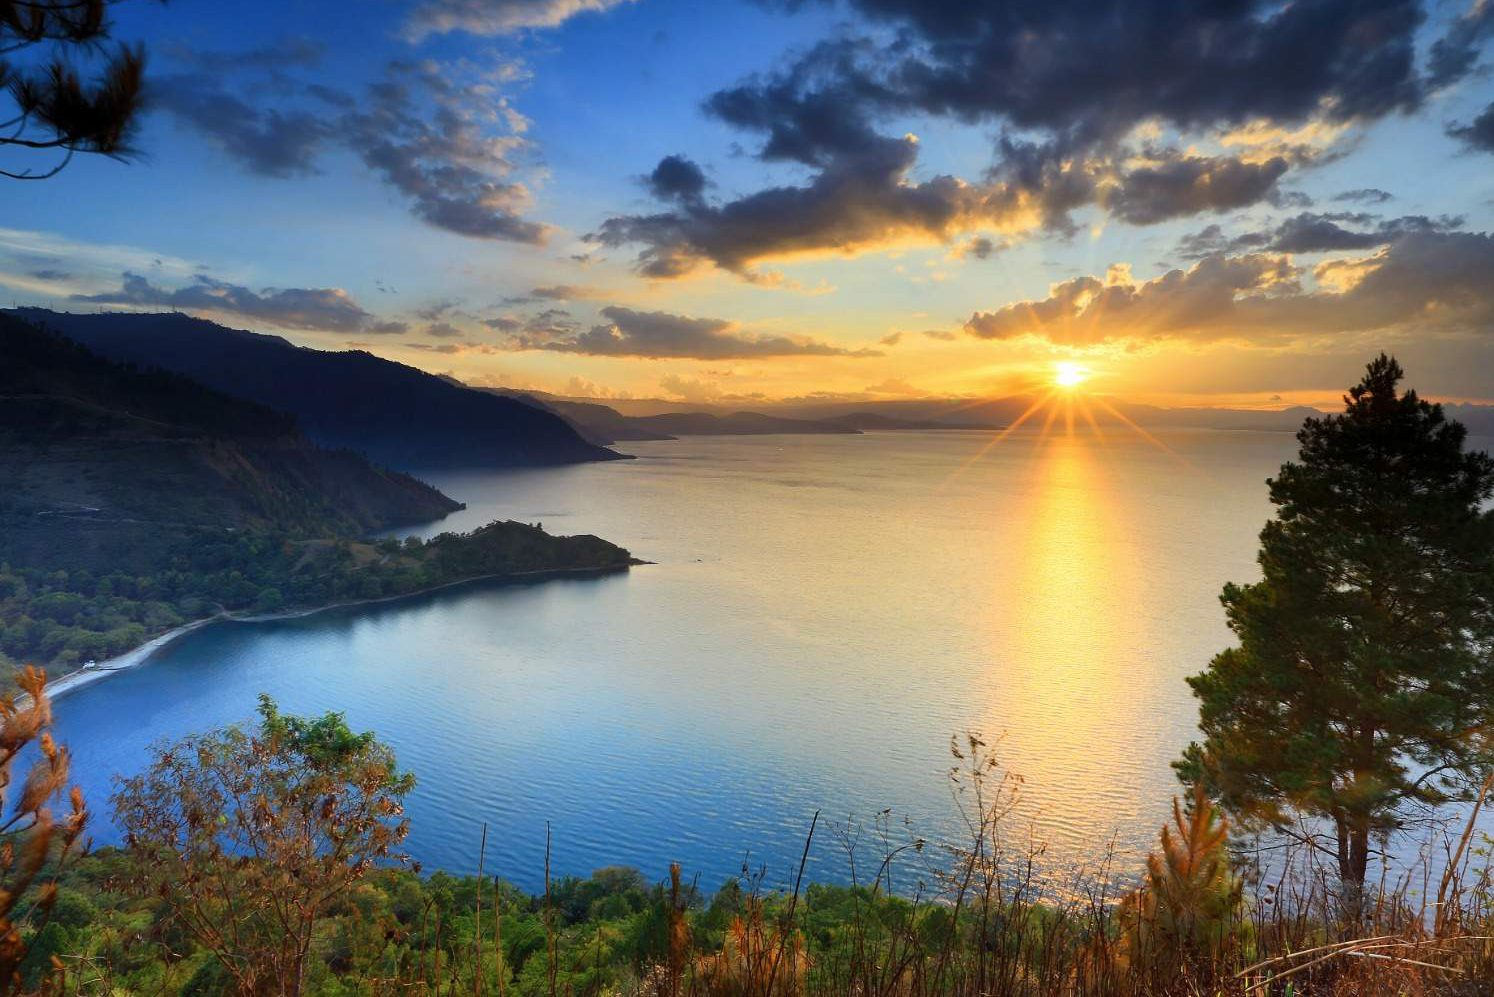

In [227]:
from IPython.display import Image
Image(filename='a.jpg', width=500)

**Gambar di atas akan diprediksi oleh best model. Kita meilihat ada 2 label pada gambar di atas:**
1. Sunset
2. Pohon


**Apakah best model dapat melakukan label yang sesuai dengan perkiraan kita??? Let's Predict...**

In [24]:
from torch.utils.data import DataLoader
from jcopdl.utils.dataloader import MultilabelDataset
import torch
from torch import nn, optim
from torchvision.models import mobilenet_v2
from torchvision import datasets, transforms

In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [26]:
mnet = mobilenet_v2(pretrained=True)

In [27]:
mnet.classifier = nn.Sequential(
    nn.Linear(1280, 5),  # 5 karena dari label2cat 
    nn.Sigmoid()         # pakai Sigmoid karena kasus kita Multilabel
)

In [28]:
class CustomMobilenetV2(nn.Module):
    def __init__(self, output_size):
        super().__init__()
        self.mnet = mobilenet_v2(pretrained=True)
        self.freeze()
        self.mnet.classifier = nn.Sequential(
            nn.Linear(1280, output_size),  # tergantung len dari label2cat 
            nn.Sigmoid()                   # pakai Sigmoid karena kasus kita Multilabel

        )
        
        
    def forward(self, x):
        return self.mnet(x)
        
    def freeze(self):
        for param in mnet.parameters():    # Weight dari sang juara kita lakukan Freeze agar tidak berubah saat di train pakai data kita
            param.requires_grad = False
    
    def unfreeze(self):
        for param in mnet.parameters():    # Weight dari sang juara kita lakukan unfreeze agarberubah saat di train pakai data kita
            param.requires_grad = True

## 7.1 Load Model

In [29]:
weights = torch.load('model/weights_best.pth', map_location='cpu')
config = torch.load('model/configs.pth', map_location='cpu')

model = CustomMobilenetV2(config.output_size).to(device)
model.load_state_dict(weights)
model = model.to(device)

In [30]:
model

CustomMobilenetV2(
  (mnet): MobileNetV2(
    (features): Sequential(
      (0): ConvBNActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): ConvBNActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): ConvBNActivation(
            (0): Conv2d(16, 96, kernel_size=(1, 1), str

In [44]:
bs = 64
crop_size = 224 # ini wajib 224, jangan dirubah karena kita pakai CNN sang juara


test_transform = transforms.Compose([   # data test jangan di augmentasi
    transforms.Resize(230),   # resize untuk menyamakan resolusi dari gambar yang berbeda-beda, tapi tetep lebih besar dari crop_size
    transforms.CenterCrop(224), # ini wajib 224, jangan dirubah karena kita pakai CNN sang juara "MobileNet V2"
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #transform normalize(normalisasi) dari model "Mobilenet V2"
])




test_set = MultilabelDataset("data/cek_label.csv", "data/cek/", transform=test_transform) #fname_col(tergantung nama kolom di csv)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)

In [45]:
feature, target = next(iter(testloader))
feature, target = feature.to(device), target.to(device) # pindahkan ke GPU 

In [46]:
with torch.no_grad():  
    model.eval()
    output = model(feature)
    preds = (output > 0.5).to(torch.float32) # 0.5 maksudnya thresholdnya
preds

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]])

In [47]:
# def convert_to_label(x):
#     return [label for pred, label in zip(x, label2cat) if pred==1]

In [48]:
# #for pred in preds:
#     pred = convert_to_label(pred)
#     print(pred)
    

In [49]:
def convert_to_label(x):
    return [label for pred, label in zip(x, label2cat) if pred==1]

def inverse_norm(img):
    img[0, :, :] = img[0, :, :] * 0.229 + 0.485
    img[1, :, :] = img[1, :, :] * 0.224 + 0.456
    img[2, :, :] = img[2, :, :] * 0.225 + 0.406
    return img

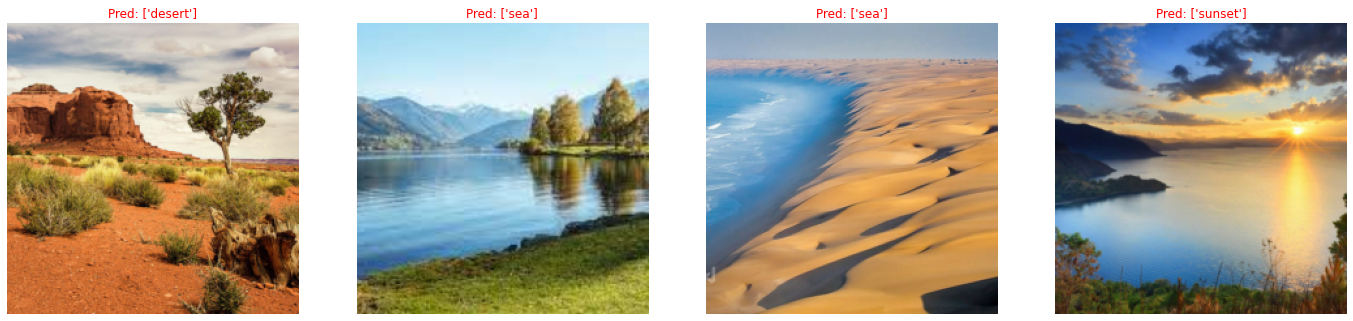

In [50]:
fig, axes = plt.subplots(1, 4, figsize=(24, 24))
for img, label, pred, ax in zip(feature, target, preds, axes.flatten()):
    ax.imshow(inverse_norm(img).permute(1, 2, 0).cpu())
    font = {"color": 'r'} if (pred != label).any() else {"color": 'g'}
    label, pred = convert_to_label(label), convert_to_label(pred)
    ax.set_title(f"Pred: {pred}", fontdict=font);
    ax.axis('off');

In [53]:
fig.savefig('test.png')

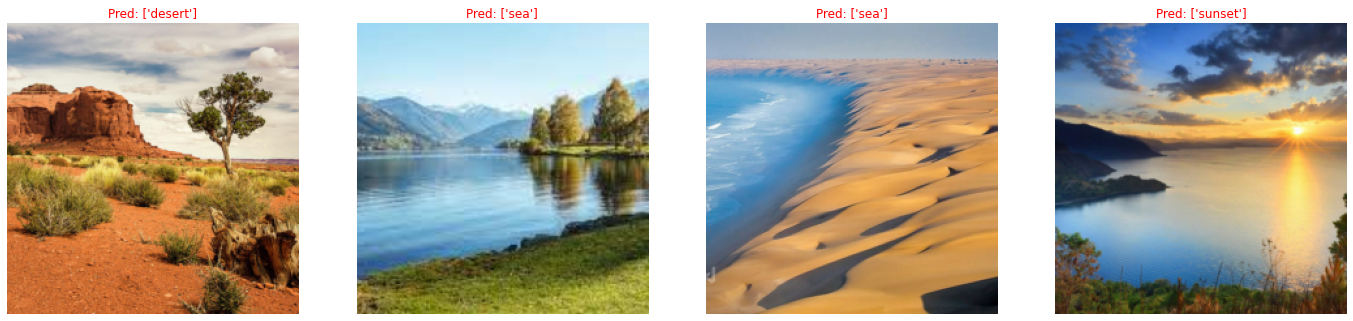

In [51]:
dfi.export(df, 'dataframe.png')

# --------------------------------------------------------------------------------------------------------------

### Thank You
Email : ramzym872@gmail.com